# Modelo de regresion

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn_pandas as sp
import sys
import copy
import warnings

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from scipy.stats.stats import pearsonr
from scipy import stats

warnings.filterwarnings('ignore')

In [13]:
# carga de datos

dataset = pd.read_csv('/home/dgomez/rrss_final.csv')
print "count: " + str(dataset['tickets'].count())
print "mean: " + str(dataset['tickets'].mean())
print "std: " + str(dataset['tickets'].std())
dataset = dataset.replace(np.NaN, 0)
total = len(dataset)
size = int(0.90 * total)

count: 1243
mean: 81.34111021721641
std: 23.539793444654286


In [14]:
# seleccion de variables

mapper = sp.DataFrameMapper([
    ('dayofweek', LabelBinarizer()),
    (['state_pob', 'capacity', 'price', 'facebook_likes', 'youtube_suscrs', 'youtube_views',
    'instagram_folls', 'instagram_likes', 'spotify_folls', 'spotify_pop',
    'twitter_folls', 'twitter_mencs_usa', 'twitter_mencs',
     'facebook_crec', 'youtube_crec', 'instagram_crec', 'twitter_crec'], StandardScaler())
    ])
X = dataset[['dayofweek', 'state_pob', 'capacity', 'price',
        'facebook_likes', 'youtube_suscrs', 'youtube_views',
        'instagram_folls', 'instagram_likes',
        'spotify_folls', 'spotify_pop',
        'twitter_folls', 'twitter_mencs_usa', 'twitter_mencs',
        'facebook_crec', 'youtube_crec', 'instagram_crec', 'twitter_crec']]
X = mapper.fit_transform(X) # numpy.ndarray
y = dataset['tickets'] # dataframe

### Comparativa KNN vs Gradient

In [15]:
from sklearn.model_selection import KFold

exp_gradient, exp_knn = [], []
for i in range(10):
    resultados_knn, resultados_gradient = [], []
    X=np.array(X)
    kf = KFold(n_splits=5,shuffle=True)
    for k, (train, test) in enumerate(kf.split(X, y)):
        X_train, X_test = X[train,:], X[test,:]
        y_train, y_test = y[train], y[test]
        
        knn = KNeighborsRegressor()
        knn.fit(X_train,y_train)
        y_pred1 = knn.predict(X_test)
        
        gradient = GradientBoostingRegressor()
        gradient.fit(X_train,y_train)
        y_pred2 = gradient.predict(X_test)
        
        resultados_knn.append(mean_squared_error(y_test,y_pred1).round(2))
        resultados_gradient.append(mean_squared_error(y_test,y_pred2).round(decimals=2))
        
    print "Resultado KNN: " + str(resultados_knn) + " = " + str(np.mean(resultados_knn).round(2))
    print "Resultado Gradient: " + str(resultados_gradient) + " = " + str(np.mean(resultados_gradient).round(2))
    print
    exp_gradient.append(np.mean(resultados_gradient))
    exp_knn.append(np.mean(resultados_knn))

Resultado KNN: [512.11, 523.59, 489.46, 679.69, 550.33] = 551.04
Resultado Gradient: [391.04, 392.35, 436.98, 449.98, 385.06] = 411.08

Resultado KNN: [524.39, 556.64, 608.58, 618.54, 498.15] = 561.26
Resultado Gradient: [380.05, 440.99, 428.86, 436.84, 389.89] = 415.33

Resultado KNN: [544.74, 557.74, 521.81, 490.11, 587.91] = 540.46
Resultado Gradient: [397.74, 409.52, 420.06, 369.95, 425.93] = 404.64

Resultado KNN: [545.17, 610.01, 485.29, 545.29, 502.92] = 537.74
Resultado Gradient: [401.48, 470.17, 367.52, 407.0, 347.5] = 398.73

Resultado KNN: [554.13, 517.01, 531.41, 557.09, 531.04] = 538.14
Resultado Gradient: [405.13, 395.63, 408.18, 386.63, 414.84] = 402.08

Resultado KNN: [532.36, 531.24, 595.05, 552.53, 614.9] = 565.22
Resultado Gradient: [427.42, 399.2, 408.5, 415.94, 457.9] = 421.79

Resultado KNN: [551.89, 463.49, 594.25, 570.25, 577.09] = 551.39
Resultado Gradient: [398.74, 344.15, 494.41, 366.61, 504.24] = 421.63

Resultado KNN: [420.07, 528.05, 660.37, 629.63, 600.08

In [16]:
print "Promedio Experimentos KNN... MEDIA: " + str(np.mean(exp_knn).round(2)) + ", STD: " + str(np.std(exp_knn).round(2))
print "Promedio Experimentos Gradient... MEDIA: " + str(np.mean(exp_gradient).round(2)) + ", STD: " + str(np.std(exp_gradient).round(2))

Promedio Experimentos KNN... MEDIA: 548.61, STD: 11.87
Promedio Experimentos Gradient... MEDIA: 411.53, STD: 7.32


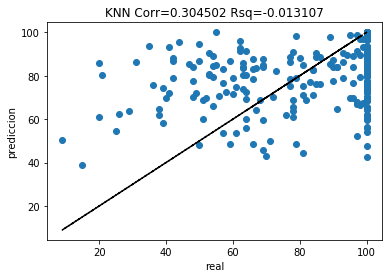

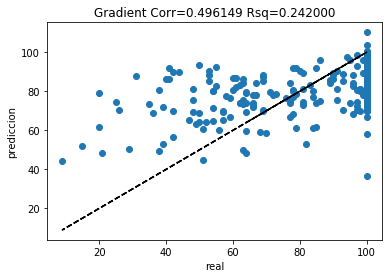

In [17]:
corr_knn = pearsonr(y_pred1,y_test)[0]
rsquared_knn = r2_score(y_test, y_pred1)
plt.scatter(y_test, y_pred1)
plt.title("KNN Corr=%f Rsq=%f"
% (corr_knn, rsquared_knn))
plt.xlabel("real")
plt.ylabel("prediccion")
plt.plot(y_test, y_test, 'k--')
plt.show()
corr_gradient = pearsonr(y_pred2,y_test)[0]
rsquared_gradient = round(
r2_score(y_test, y_pred2), 3)
plt.scatter(y_test, y_pred2)
plt.title("Gradient Corr=%f Rsq=%f"
% (corr_gradient, rsquared_gradient))
plt.xlabel("real")
plt.ylabel("prediccion")
plt.plot(y_test, y_test, 'k--')
plt.show()

In [18]:
t2, p2 = stats.ttest_ind(exp_gradient, exp_knn)
print("t = " + str(t2))
print("p = " + str(p2))
print
if p2<0.05:
    print("Rechazamos la hipotesis NULA. Las diferencias son estadisticamente significativas!")
else:
    print("No podemos rechazar la hipotesis NULA. Las diferencias no son estadisticamente significativas!")

t = -29.489584572074087
p = 1.085464071194575e-16

Rechazamos la hipotesis NULA. Las diferencias son estadisticamente significativas!
